In [5]:
import numpy as np
from matplotlib import lines, pyplot as plt
from pathlib import Path
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import os
from matplotlib import ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import patches
from matplotlib.lines import Line2D

plt.style.use('sg_article')

#from tqdm import tqdm
#plt.rcParams.update({'font.size': 10})

In [2]:
#path = Path(f"../../periodicAlphaShapes/result")
path = Path(f"result2")

In [6]:
def flatten(list_of_list):
    return np.array([item for sublist in list_of_list for item in sublist])

def plot_elements(edges, facets, alpha, ax, shift):
    #plot edges
    for edge in edges:
        edge[::2] += shift[0]
        edge[1::2] += shift[1]
        x1, y1, x2, y2 = edge
        ax.plot([x1, x2], [y1, y2], c = 'k')

    #plot facets
    for facet in facets:
        facet[::2] += shift[0]
        facet[1::2] += shift[1]
        x1, y1, x2, y2, x3, y3 = facet
        path = [[x1, y1], [x2, y2], [x3, y3]]
        a = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
        b = ((x3 - x2)**2 + (y3 - y2)**2)**0.5
        c = ((x1 - x3)**2 + (y1 - y3)**2)**0.5
        Circumradius = a * b * c / ((a + b + c) * (b + c - a) * (c + a - b) * (a + b - c))**0.5

        if Circumradius < alpha:
            ax.add_patch(patches.Polygon(path))

def plot_areas(zeta, ax):
    data_dir = Path("defect_data") / zeta

    points = np.genfromtxt(data_dir / "pos")
    edges = np.genfromtxt(data_dir / "edges.txt")
    facets = np.genfromtxt(data_dir / "facets.txt")
    alpha = np.genfromtxt(data_dir / "alpha.txt")

    # well if it works
    plot_elements(np.copy(edges), np.copy(facets), alpha, ax, np.array([0,0]))
    plot_elements(np.copy(edges), np.copy(facets), alpha, ax, np.array([2048,0]))
    plot_elements(np.copy(edges), np.copy(facets), alpha, ax, np.array([-2048,0]))
    plot_elements(np.copy(edges), np.copy(facets), alpha, ax, np.array([0,2048]))
    plot_elements(np.copy(edges), np.copy(facets), alpha, ax, np.array([0,-2048]))
    plot_elements(np.copy(edges), np.copy(facets), alpha, ax, np.array([2048,2048]))
    plot_elements(np.copy(edges), np.copy(facets), alpha, ax, np.array([-2048,2048]))
    plot_elements(np.copy(edges), np.copy(facets), alpha, ax, np.array([-2048,-2048]))
    plot_elements(np.copy(edges), np.copy(facets), alpha, ax, np.array([2048,-2048]))
	
    #plots points
    ax.scatter(points[:, 0], points[:, 1], c = 'r', s = 2.0)
    ax.set(xlim=(0, 2048), ylim=(0, 2048) )


In [7]:
zeta_values = ["0.019", "0.0195", "0.020", "0.021", "0.0215", "0.022", "0.0225", "0.023", "0.024", "0.025", "0.028", "0.030", "0.034", "0.05", "0.06"]
zeta_values = [ "0.020", "0.021", "0.0215", "0.022", "0.0225", "0.023", "0.024", "0.025", "0.028", "0.030", "0.034", "0.05", "0.06"]

zeta_values_to_load = ["0.021", "0.022", "0.024"]

defect_max_radii = np.load(path / "defect" / "max_radii.npy", allow_pickle=True).item()
uniform_max_radii = np.load(path / "uniform" / "max_radii.npy", allow_pickle=True).item()
defect_max = np.load(path / "defect" / "max.npy", allow_pickle=True).item()
defect_areas = np.load(path / "defect" / "area.npy", allow_pickle=True).item()
defect_alpha = np.load(path / "defect" / "alpha.npy", allow_pickle=True).item()

uniform_max = np.load(path / "uniform" / "max.npy", allow_pickle=True).item()
uniform_areas = np.load(path / "uniform" / "area.npy", allow_pickle=True).item()
uniform_alpha = np.load(path / "uniform" / "alpha.npy", allow_pickle=True).item()

defect_max_mean = np.array([np.mean(np.array(defect_max[zeta]) / 2048**2)  for zeta in zeta_values])
defect_max_std = np.array([np.std(np.array(defect_max[zeta]) / 2048**2) / np.sqrt(len(np.array(defect_max[zeta]))) for zeta in zeta_values])

defect_area_mean = np.array([np.mean(flatten(defect_areas[zeta])) / 2048**2 for zeta in zeta_values])

uniform_max_mean = np.array([np.mean(np.array(uniform_max[zeta]) / 2048**2)  for zeta in zeta_values])
uniform_max_std = np.array([np.std(np.array(uniform_max[zeta]) / 2048**2) / np.sqrt(len(np.array(uniform_max[zeta])))for zeta in zeta_values])
uniform_area_mean = np.array([np.mean(flatten(uniform_areas[zeta])) / 2048**2 for zeta in zeta_values])

defect_max_radii_mean = np.array([np.mean(np.array(defect_max_radii[zeta]))  for zeta in zeta_values])
defect_max_radii_std = np.array([np.std(np.array(defect_max_radii[zeta])) / np.sqrt(len(np.array(defect_max_radii[zeta]))) for zeta in zeta_values])
uniform_max_radii_mean = np.array([np.mean(np.array(uniform_max_radii[zeta]))  for zeta in zeta_values])
uniform_max_radii_std = np.array([np.std(np.array(uniform_max_radii[zeta])) / np.sqrt(len(np.array(uniform_max_radii[zeta]))) for zeta in zeta_values])


c:\Users\Simon Andersen\miniconda3\envs\sf\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Simon Andersen\miniconda3\envs\sf\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Simon Andersen\miniconda3\envs\sf\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Simon Andersen\miniconda3\envs\sf\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Simon Andersen\miniconda3\envs\sf\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
for key in sorted(uniform_max.keys()):
    print(key)  
    print(len(defect_max[key]))
    print(len(uniform_max[key]), "\n")

In [8]:

radii_fraction_err = np.sqrt((1/(uniform_max_radii_mean ))**2 * defect_max_radii_std**2 + (- defect_max_radii_mean / (uniform_max_radii_mean**2))**2 * uniform_max_radii_std**2 ) 
radii_fraction = defect_max_radii_mean/ uniform_max_radii_mean

fraction_err = np.sqrt((1/(uniform_max_mean ))**2 * defect_max_std**2 + (- defect_max_mean / (uniform_max_mean**2))**2 * uniform_max_std**2 ) 
fraction = defect_max_mean/ uniform_max_mean

zeta_values = np.array([float(z) for z in zeta_values])
gradients = np.gradient(fraction, zeta_values)
 
act_diff = np.array(zeta_values[1:]) - np.array(zeta_values[:-1])
fwd_diff = np.diff(fraction) / act_diff
fwd_err = np.sqrt(fraction_err[1:]**2 + fraction_err[:-1]**2) / act_diff



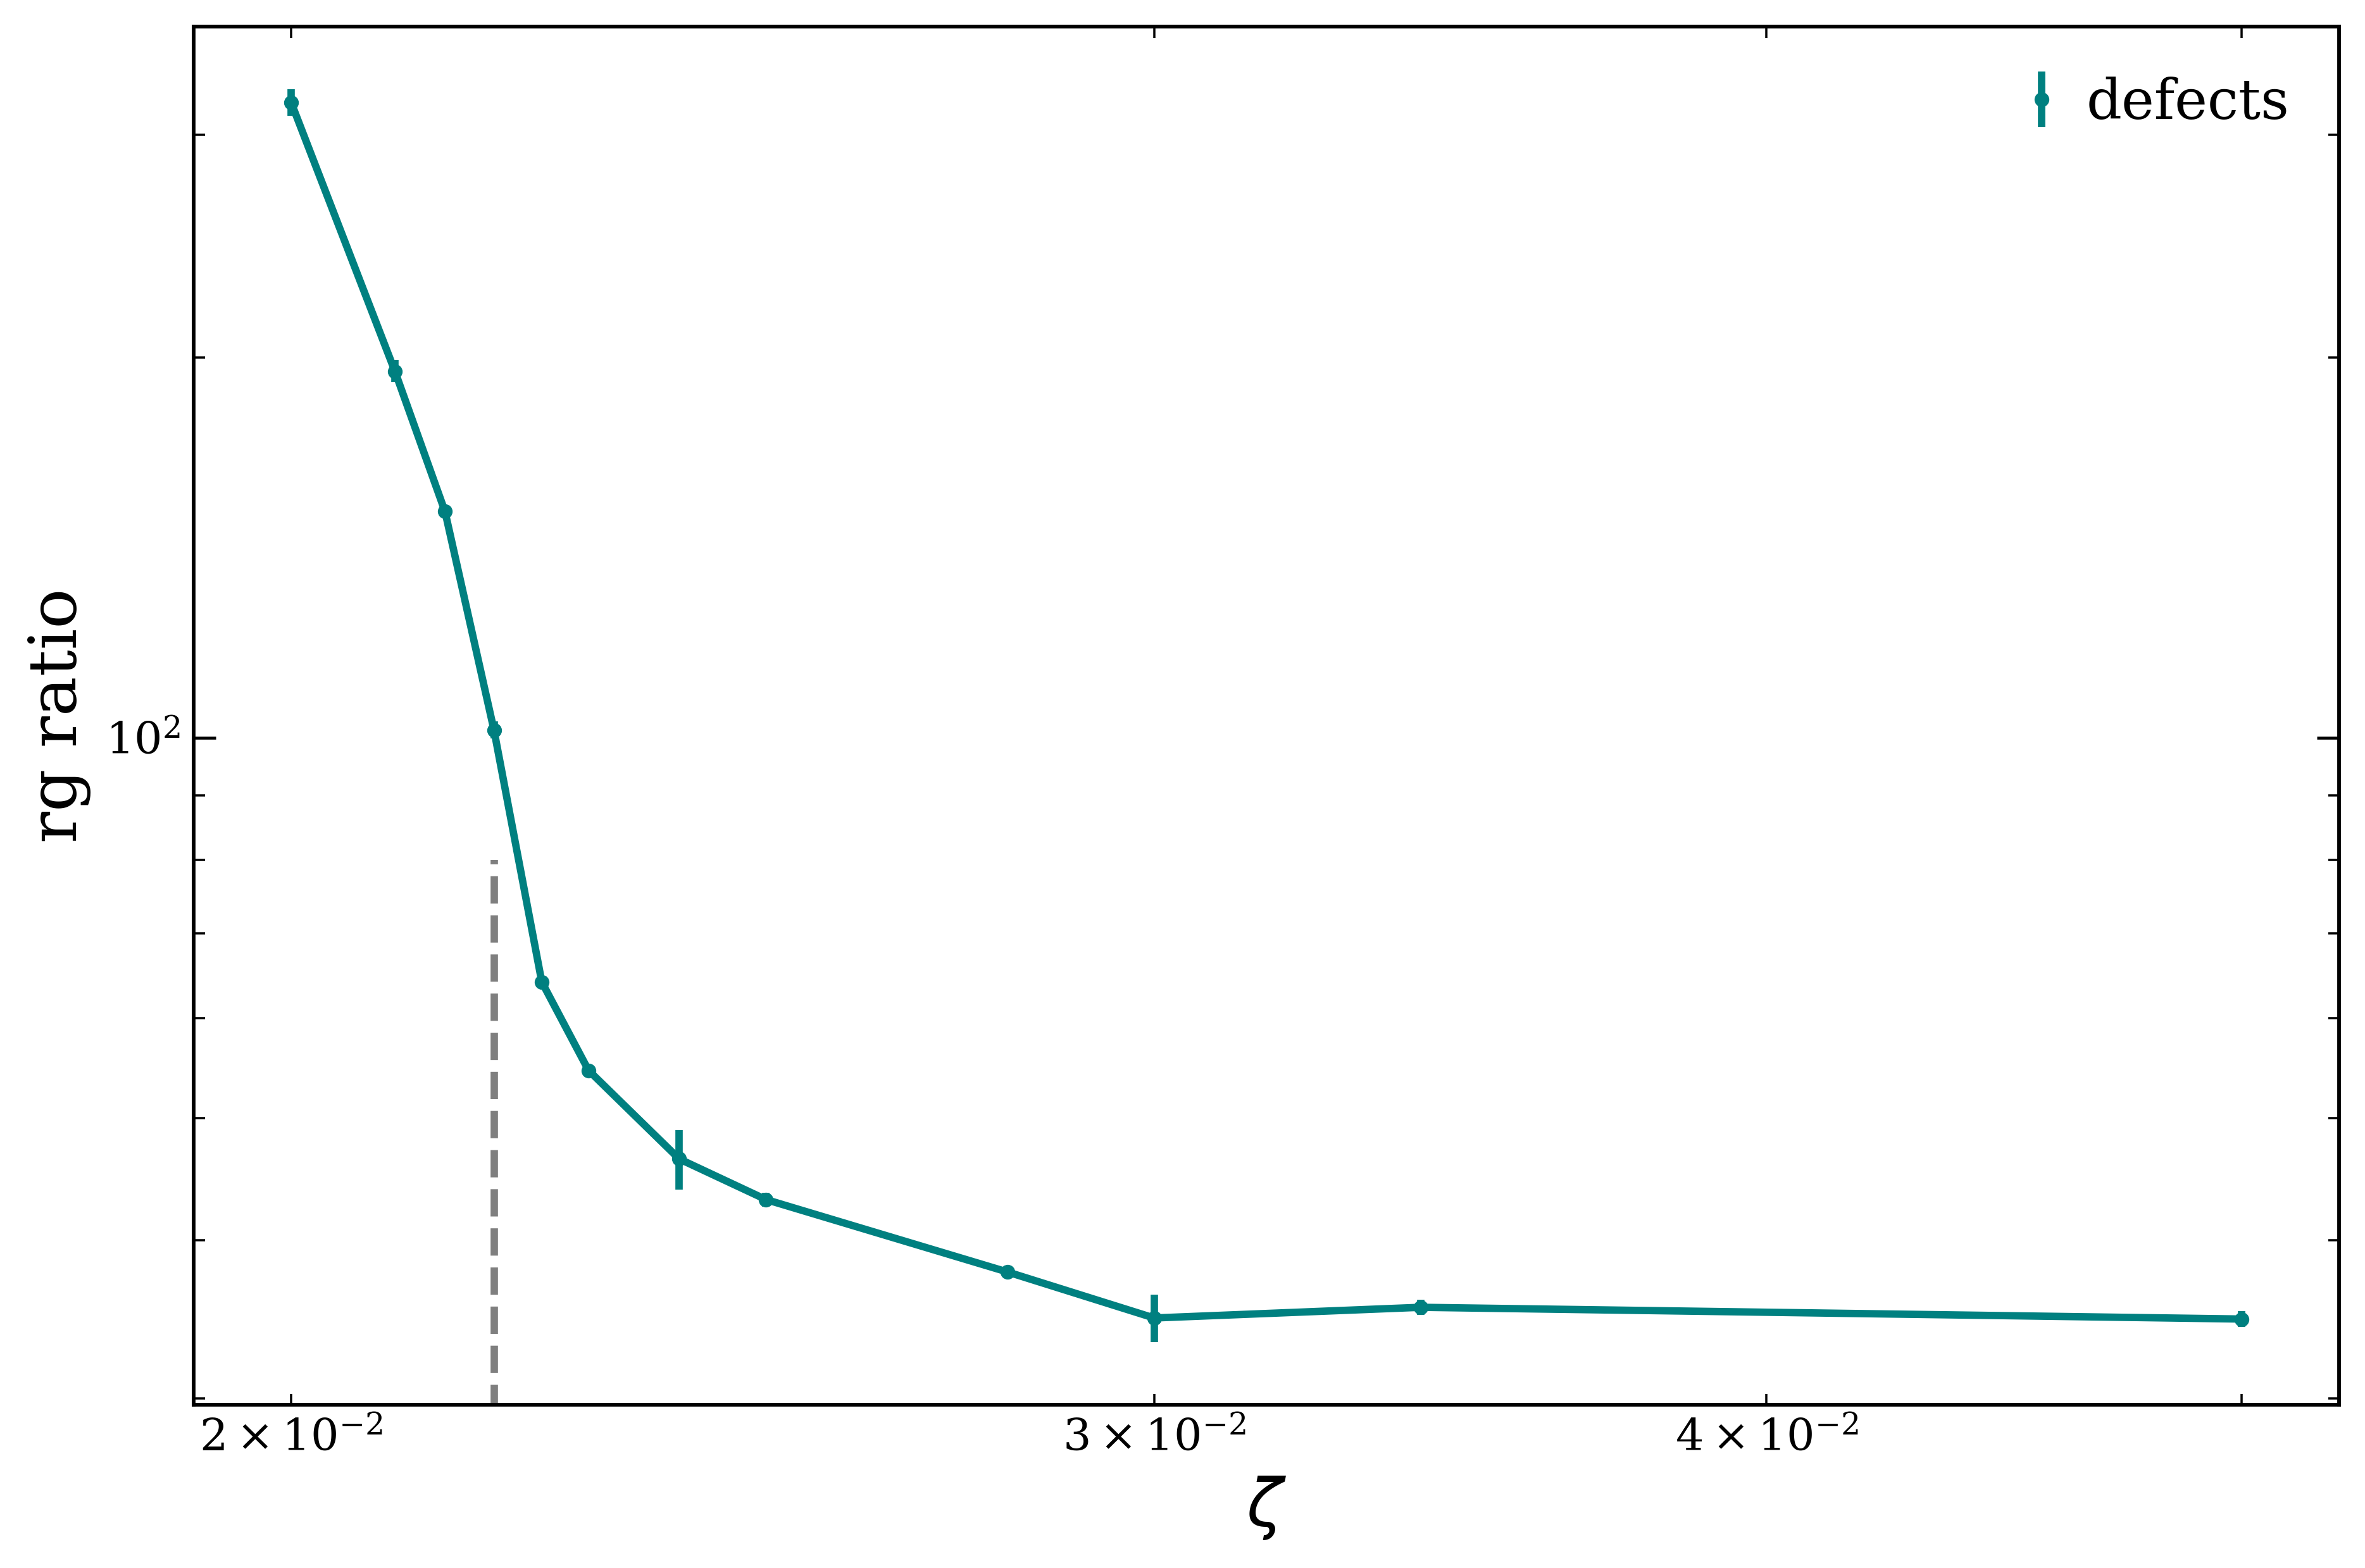

In [49]:
fig, ax = plt.subplots()
ax.errorbar(zeta_values, defect_max_radii_mean/np.sqrt(0.05/zeta_values), defect_max_radii_std/np.sqrt(0.05/zeta_values), fmt=".-", label='defects')
#ax.errorbar(zeta_values, uniform_max_radii_mean, uniform_max_radii_std, fmt=".-", label='uniform')
#ax.errorbar(zeta_values, radii_fraction, radii_fraction_err, fmt=".-", label='defects/uniform')
ax.vlines(0.022,0,80, color='k', alpha=.5, linestyle='--')

ax.set_ylabel('rg ratio') 
ax.set_xlabel(r"$\zeta$")
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()

In [ ]:

nrows = len(zeta_values) // 3 + 1
fig, axx = plt.subplots(nrows = nrows, ncols=3, figsize=(15, 5 * nrows))
axx = axx.flatten()

zeta_keys_sorted = sorted(uniform_max.keys())
normalizer = 2048**2

for i, ax in enumerate(axx):
    zeta = zeta_keys_sorted[i] #zeta_values[i]

    ax.set_title(f"zeta = {zeta}")

    nrange = (min(np.nanmin(uniform_max[zeta]), np.nanmin(defect_max[zeta]))/normalizer, max(np.nanmax(uniform_max[zeta]) , np.nanmax(defect_max[zeta]))/normalizer)
    nbins = 30
    ax.hist(np.array(uniform_max[zeta])/normalizer, bins = nbins, range = nrange, alpha = 0.5, label = "uniform", density=True)
    ax.hist(np.array(defect_max[zeta])/normalizer, bins = nbins, range = nrange, alpha = 0.5, label = "defect", density=True)
    ax.legend(handlelength=1)

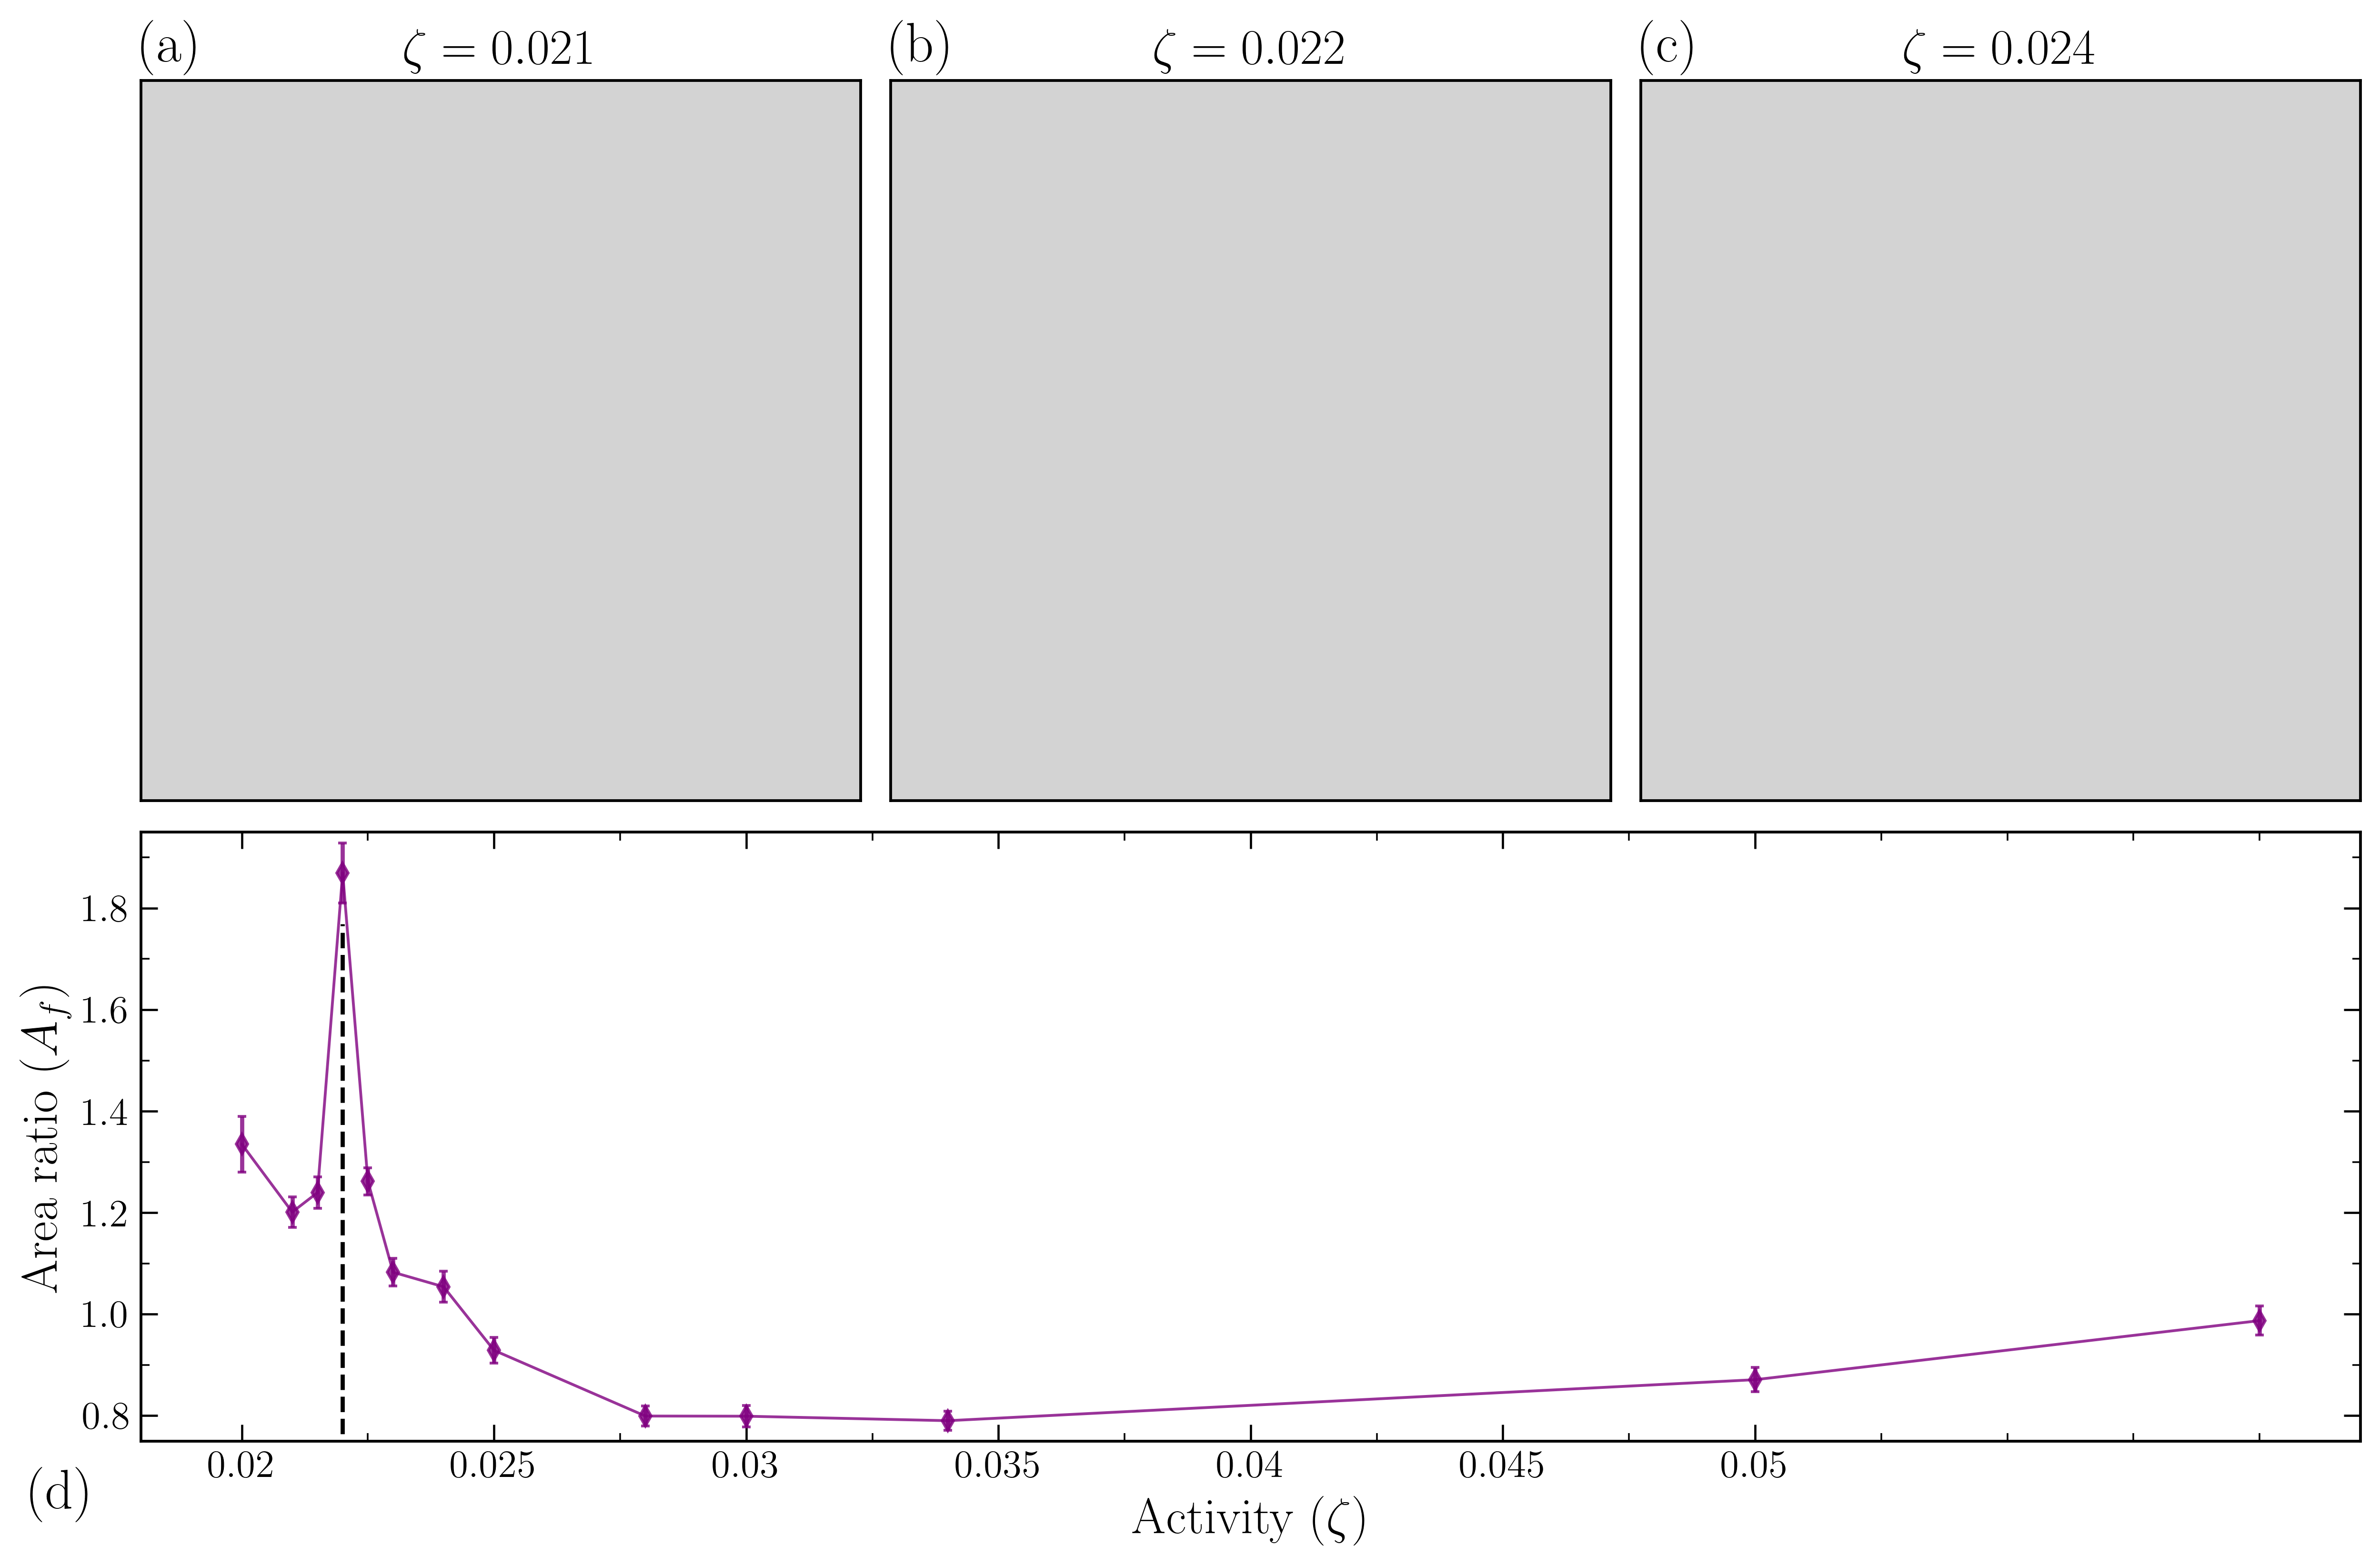

In [55]:
#plt.rcParams.update({'font.size': 15})
# Create a figure
plot_gradient = False
fig = plt.figure(figsize=(12,8))#, constrained_layout=True)
plt.rcParams.update({
    "text.usetex": True})
# Define a GridSpec with 2 rows and 3 columns

gs = gridspec.GridSpec(2, 3, height_ratios=[1, .7])  # Top row is smaller, bottom row is larger

# Add the three smaller plots in the top row
ax_pre = fig.add_subplot(gs[0, 0])  # First column, top row
ax_on = fig.add_subplot(gs[0, 1])  # Second column, top row
ax_post = fig.add_subplot(gs[0, 2])  # Third column, top row
ax_fraction = fig.add_subplot(gs[1, :])  # Entire bottom row

ax_pre.set(xticks=[], yticks=[], title=fr"$\zeta = {zeta_values_to_load[0]}$", aspect="equal", zorder=5)
ax_on.set(xticks=[], yticks=[], title=fr"$\zeta = {zeta_values_to_load[1]}$", aspect="equal", zorder=5)
ax_post.set(xticks=[], yticks=[], title=fr"$\zeta = {zeta_values_to_load[2]}$", aspect="equal", zorder=5)

ax_pre.set_facecolor('lightgray')
ax_on.set_facecolor('lightgray')
ax_post.set_facecolor('lightgray')

ax_fraction.errorbar(zeta_values, fraction, yerr=fraction_err, fmt = 'd-',
                 color=f'C{3}', markersize=5,
                alpha=.8, elinewidth=1.5, capsize=1.5, capthick=1, lw=1)
ax_fraction.set(xlabel=r"Activity ($\zeta$)",zorder=1)
#ax_fraction.set(xlabel=r"$\zeta$", ylabel=r"$\frac{<\textup{area}_{H_1}>_{\text{nematic}}}{<\text{area}_{H_1}>_{\text{uniform}}}$", zorder=1)
ax_fraction.set_ylabel(r"Area fraction ($\overline{A^{{nem}}_{max}}/\overline{A^{uni}_{max}}$)")
ax_fraction.set_ylabel(r"Area fraction ($\max \overline{A_{{nem}}}/ \max \overline{A_{uni}}$)")
ax_fraction.set_ylabel(r"Area ratio ($A_f$)")
ax_fraction.vlines(0.022, 0, ymax=np.nanmax(fraction)-.1, linestyles="dashed", color="black",lw=1.5,)

width = 0.3
inset_box = [0.6, 0.26,width,2.3*width]
if plot_gradient:
    ax_gradient = ax_fraction.inset_axes(inset_box)

    # Add an inset plot within the lower plot
    #ax_gradient = inset_axes(ax_fraction, width="25%", height="50%", loc="upper right",bbox_to_anchor=(0.5, 0.7, .5, .8))# borderpad=3)
    ax_gradient.set_zorder(5)

    # Plot data in the inset plot
    ax_gradient.errorbar(zeta_values[:-1] + act_diff/2, fwd_diff, fwd_err, fmt='d-',color=f'C{3}',
                    alpha=.85, elinewidth=1.5, capsize=1.5, capthick=1, markersize = 5, lw=1)#, zorder=11)  # Example inset plot data
    ax_gradient.vlines(0.022, ymin=-1500,ymax=1500, linestyles="dashed", color="black",lw=1.5, alpha=.9,)# label="$\zeta = 0.022$")
    # label="$\zeta = 0.022$")
    #ax_gradient.set(xlim=[0.02,0.031],ylim=[-1500,1500], xlabel=r"Activity ($\zeta$)", ylabel=r"$\frac{\partial \overline{A^{{nem}}_{max}}/\overline{A^{uni}_{max}}}{\partial \zeta}$",)# title=r"Derivative")
    ax_gradient.set(xlim=[0.02,0.030],ylim=[-1500,1500], xlabel=r"Activity ($\zeta$)", ylabel=r"$\partial_\zeta \left( \overline{A^{{nem}}_{max}}/\overline{A^{uni}_{max}} \right)$",)# title=r"Derivative")
    ax_gradient.set(xlim=[0.02,0.030],ylim=[-1500,1500], xlabel=r"Activity ($\zeta$)", ylabel=r"$\Delta A_f / \Delta \zeta$")#\partial_\zeta \left( \overline{A^{{nem}}_{max}}/\overline{A^{uni}_{max}} \right)$",)# title=r"Derivative")

    # Find better label text
    #ax_gradient.set_ylabel(r"$\frac{\partial <H_1 \text{ area fraction}>}{\partial \zeta}$", fontsize=15)
    ax_gradient.legend()#fontsize=10)

#plot_areas(zeta_values_to_load[0], ax_pre)
#plot_areas(zeta_values_to_load[1], ax_on)
#plot_areas(zeta_values_to_load[2], ax_post)


xticks = [0.02, 0.024, 0.030, 0.04, 0.06, 0.08,.1]
xtick_gradient = np.round(np.arange(0.022,0.0305,0.003),3)
xticks = np.round(np.arange(0.02,0.051,0.005),3)
xtick_labels = [0.02, 0.024, 0.03, 0.04, 0.06, 0.08,.1]
ax_fraction.set_xticks(xticks, xticks)#, fontsize=10)
ax_fraction.tick_params(axis='both',which='major', labelsize=14)
#axx.tick_params(axis='both',which='major', labelsize=13)
ax_fraction.yaxis.set_minor_locator(ticker.MultipleLocator(.1))
ax_fraction.xaxis.set_minor_locator(ticker.MultipleLocator(.0025))
ax_fraction.set_ylim(ymin=0.75, ymax=1.95)

if plot_gradient:
    ax_gradient.tick_params(axis='both',which='major', labelsize=14)
    ax_gradient.xaxis.set_minor_locator(ticker.MultipleLocator(.001))
    ax_gradient.yaxis.set_minor_locator(ticker.MultipleLocator(500))
    ax_gradient.set_xticks(xtick_gradient, xtick_gradient)

import string #string.ascii_lowercase[n]
for n, AXX in enumerate([ax_pre, ax_on, ax_post, ax_fraction]):
    AXX.text(-0.05 if n==3 else 0, -.11 if n ==3 else 1.027, rf'{{({string.ascii_lowercase[n]})}}', transform=AXX.transAxes,
            size=20, weight='normal')

fig.tight_layout()
fig.subplots_adjust(hspace=0.05, wspace=0.1) 
# Show the plot
#fig.dpi=60
suffix = '' if plot_gradient else '_no_gradient'
save_path = f"C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Figures\\article\\area{suffix}.jpeg"
#fig.savefig(save_path, dpi=420)#dpi=420)

In [182]:
os.path.isfile(save_path)

True

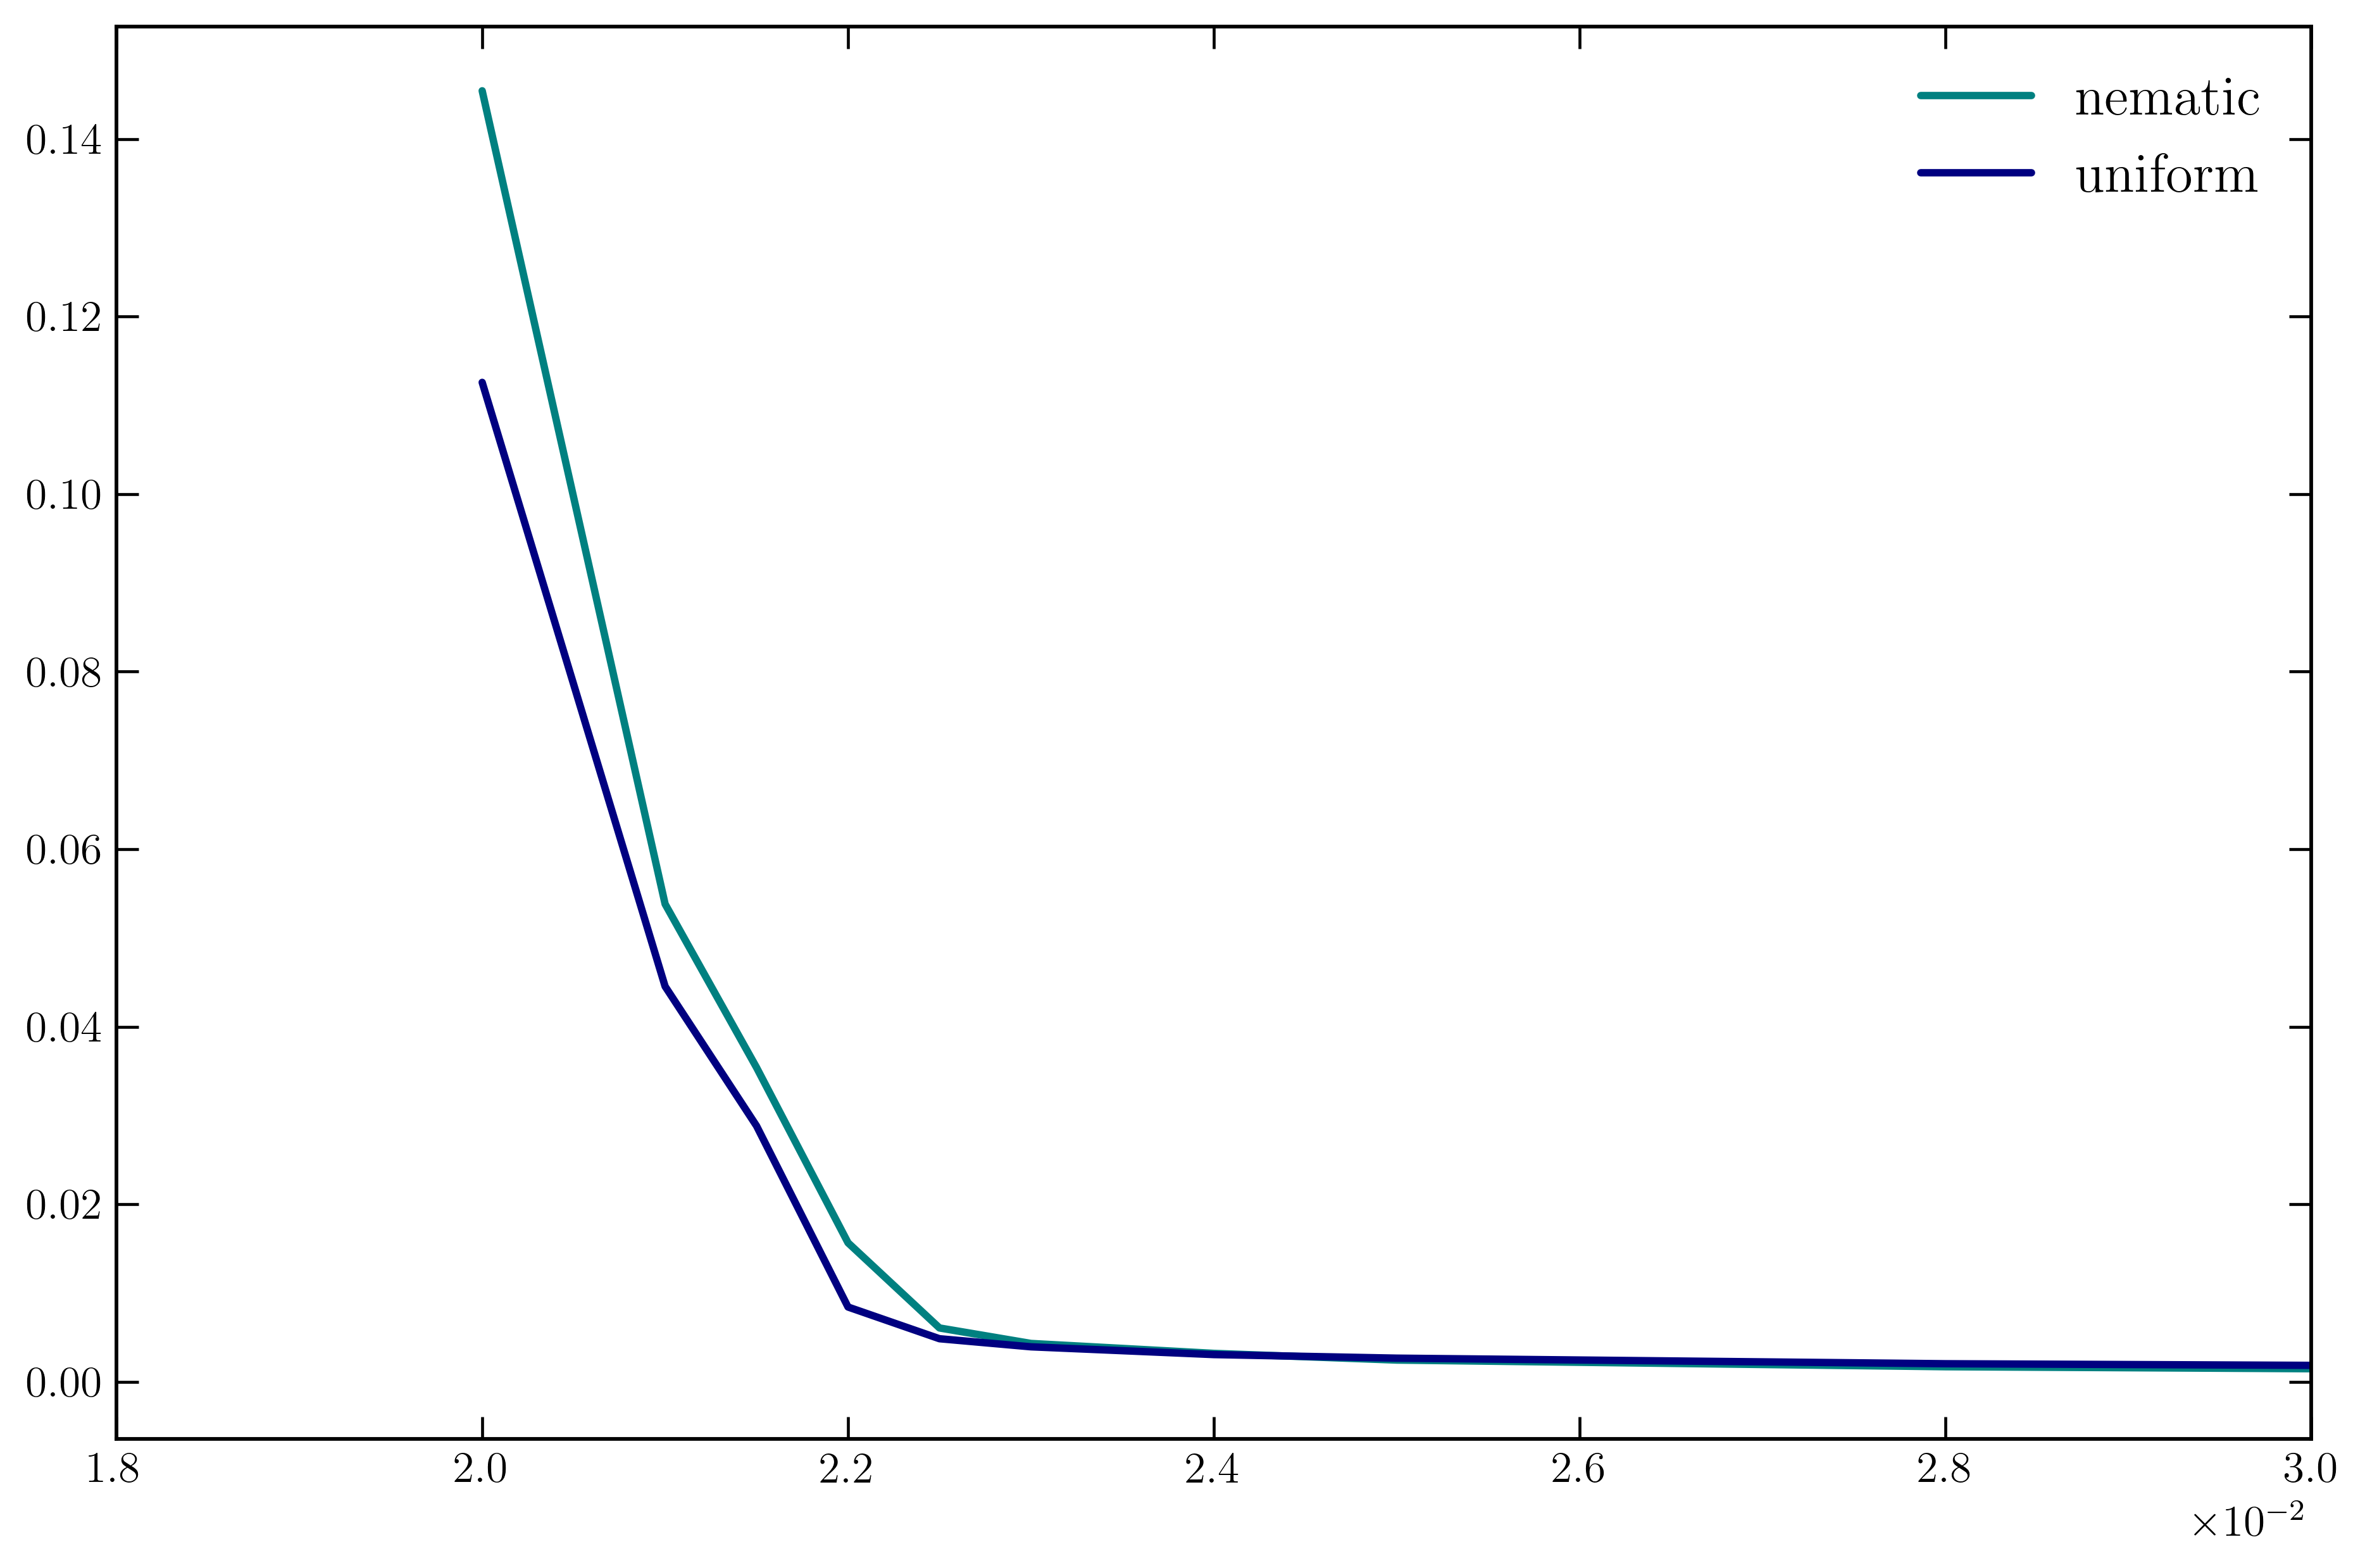

In [81]:
nemg = np.gradient(fraction, defect_max_mean)
uniformg = np.gradient(fraction, uniform_max_mean)

plt.plot(zeta_values, defect_max_mean, label="nematic")
plt.plot(zeta_values, uniform_max_mean, label="uniform")
plt.xlim(xmax=0.03)
plt.legend(handlelength=2)

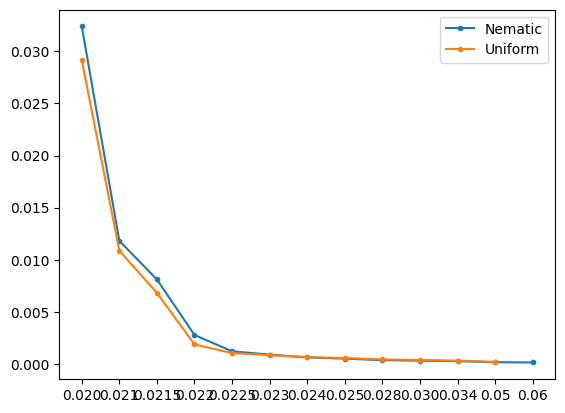

In [85]:
fig, ax = plt.subplots()
ax.plot(zeta_values, defect_area_mean, ".-", label="Nematic")
ax.plot(zeta_values, uniform_area_mean, ".-", label="Uniform")
ax.legend()

Text(0, 0.5, '$\\frac{<\\text{max area}_{H_1}>_{\\text{nematic}}}{<\\text{max area}_{H_1}>_{\\text{uniform}}}$')

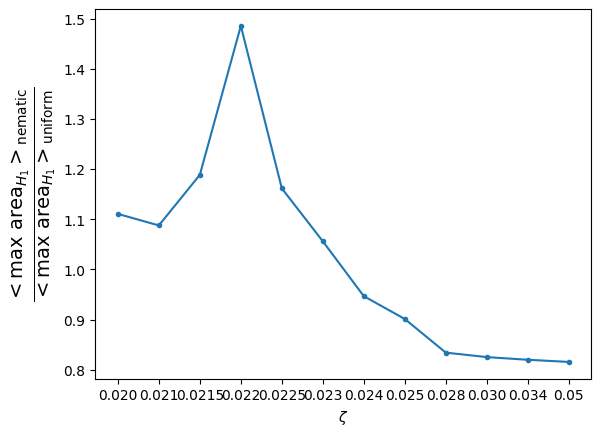

In [86]:
fraction_area = defect_area_mean/ uniform_area_mean
fig, ax = plt.subplots()
ax.plot(zeta_values, fraction_area, ".-")

ax.set(xlabel="$\zeta$", ylabel=r"$\frac{<\text{area}_{H_1}>_{\text{nematic}}}{<\text{area}_{H_1}>_{\text{uniform}}}$", zorder=1)
ax.set_ylabel(r"$\frac{<\text{max area}_{H_1}>_{\text{nematic}}}{<\text{max area}_{H_1}>_{\text{uniform}}}$", fontsize=20)

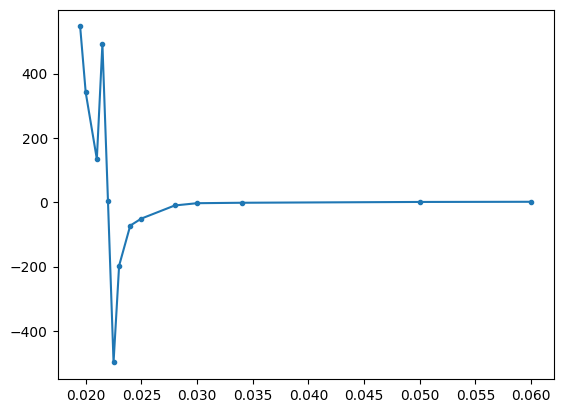

In [14]:

zeta_values = np.array([float(z) for z in zeta_values])
gradients = np.gradient(fraction, zeta_values)
fig, ax = plt.subplots()
ax.plot(zeta_values, gradients, ".-")